In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [2]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math
import random
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']


'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']

filenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new']

filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']'''


"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',\n              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',\n              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']\n\nfilenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new', \n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new', \n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',\n      

In [6]:
def pick_event_of_mag(df, mag):
    mag_events = df.loc[round(df['eq_mag'],1) == mag]
    #print(len(mag_events))
    rand_n = random.randint(0, len(mag_events)-1)
    #print(rand_n)
    mag_events = mag_events.reset_index(drop=True)
    return mag_events.loc[rand_n].to_frame()
     

In [7]:
def n_gr(m):
    return 10**(3-1*m)

In [8]:
def generate_mag_dist(N_eq):
    mag_dist = []
    for m in (np.arange(3,8,0.1)):
        n = (n_gr(m)-n_gr(m+0.1))*N_eq
        for _ in range(int(n)):
            mag_dist.append(round(m,1))
    return mag_dist

In [9]:
def make_subset_df(df, N_eq=None):
    if N_eq == None:
        N_eq = len(df)
    mag_dist = generate_mag_dist(N_eq)
    
    event = pick_event_of_mag(df, mag_dist[0])
    df1 = event#.to_frame()
    #print(df1)
    for mag in mag_dist[1:]:
        event = pick_event_of_mag(df, mag)
        df2 = event#.to_frame()
        df1 = pd.merge(df1, df2, left_index=True, right_index=True)
    return df1
    

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20
tp 0.365140212486108
pgd 0.35323927135861966
tc 0.38755019699994253
iv2 0.26262798929055003
[0.16055821799641198, 0.1607486849571653, 0.18655136888661322, 0.18804676046955499, 0.1917980616250697, 0.19169054177936054, 0.17876425626149225, 0.13831699831945468, 0.12579406469205784, 0.13253310769079288, 0.090869279074816, 0.11609041316733755, 0.07295371804456427, 0.06323708769633743, 0.07573098673503754, 0.08645079739095643, 0.08125874138364893, 0.057921592456384466, 0.033329505583485394, 0.05572068501106005, 0.03064096293024151, 0.10508253474026555, 0.1393607760520692, 0.27068447373935867, 0.03983567729412867, -0.17184957931536385, -0.2895206672382056, 0.3120126335365454, 0.7345602268692955, 0.8709851221074162, -2.983116885099706, -1.5233992637610985]
[13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
i=0
i=1
in else
in else
in else
[0.5293085545433553, 0.6020115205900942, 0.6053050408534807, 0.6014851771433476, 0.58929951223

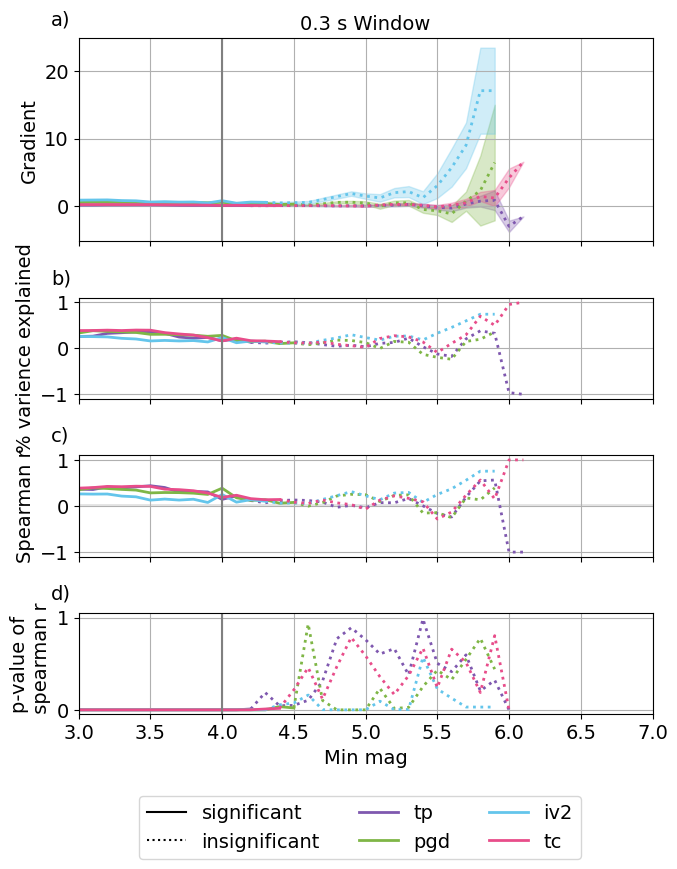

eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20
tp 0.3846052687204041
pgd 0.3767810065014222
tc 0.3522183326484436
iv2 0.32342182732282604
[0.19164920516295664, 0.19471831086914004, 0.21423477455228584, 0.21100327579599648, 0.22476488846709214, 0.23137853813690068, 0.2202190342345584, 0.1915516963142899, 0.18385607267242013, 0.1605326230954306, 0.150593100715775, 0.1932885699230681, 0.16445930137347856, 0.16834150979203644, 0.15255012201387527, 0.20569259395753786, 0.21780388374730505, 0.17335525855398587, 0.11020311263903333, 0.13778648087364784, 0.19775466388991175, 0.20140011185831497, -0.06861784875156551, -0.010078723517216092, -0.12450164418091224, 0.08903117698020492, 0.24955808647246924, 0.6239051452430808, 0.9686794140339531, 1.6624566906772067, 3.5502385953046067, 2.1199614322026634]
[18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29]
i=0
i=1
in else
in else
in else
[0.5844577757851527, 0.6565350634416035, 0.6681240698872506, 0.6920343022894011, 0.6941360121640268, 0.654759046

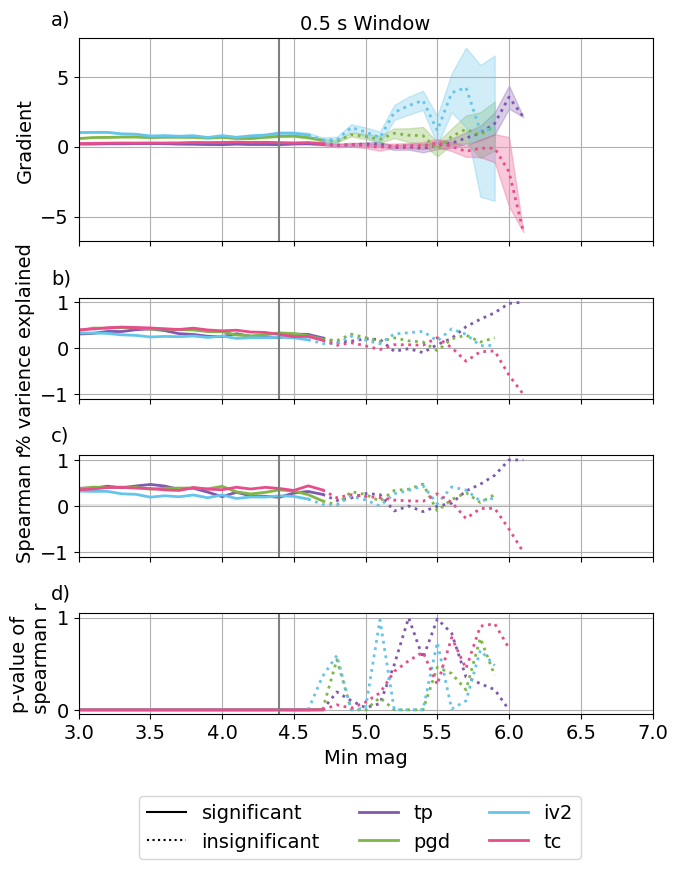

eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20
tp 0.3893502909464894
pgd 0.42492492544080057
tc 0.3432833911092916
iv2 0.38026492766135467
[0.19410950533770285, 0.19637280807579544, 0.22076722419309378, 0.22542006395714898, 0.23467926680747642, 0.23505809956898469, 0.21296058931912817, 0.1788150987583848, 0.1690599708108639, 0.16383502186307206, 0.14808151047027016, 0.17236458480553726, 0.14811585624617052, 0.11889966851125577, 0.12069643970153564, 0.18151335230950472, 0.13765749929858995, 0.11490976016424971, 0.09903699052533048, 0.05550594088922896, 0.005414308078270501, -0.01288463236388861, -0.19220299336726998, -0.18690453826089093, -0.1064495398290947, 0.15222578236170362, 0.35431423829243086, 0.6063180998224968, 0.5756063405776204, 0.3979311302904372, -0.473124418743623]
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
i=0
i=1
in else
in else
in else
[0.6737940244114626, 0.7466224172594483, 0.7699796862344107, 0.7937802395686739, 0.8100806465979095, 0.7710705532232781, 0.79524

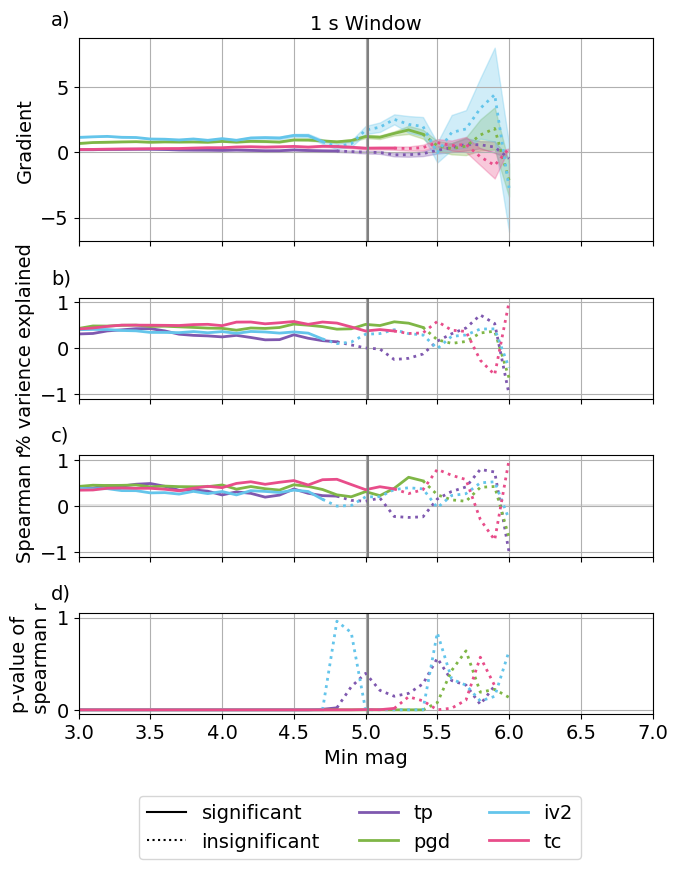

eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20
tp 0.390274446307263
pgd 0.49263230418957205
tc 0.21750128776418645
iv2 0.4438890204013795
[0.17553367813098616, 0.17720918515265469, 0.19380607516826392, 0.1940815062423147, 0.20188307326919627, 0.19845555687498317, 0.17897684563487137, 0.14650118088663017, 0.13291760541262324, 0.12463938579887918, 0.10146591048220605, 0.11294437824492681, 0.0934077790131406, 0.1007648299464549, 0.13173499978977976, 0.15402008735656078, 0.10050893608012347, 0.07727389015220969, 0.046481555832355886, 0.028291403525480718, -0.057056571248636216, -0.05698921892504459, -0.06880070478508554, 0.00883898585747639, 0.13050657388224118, -0.16052895670092282, -0.2992710032258586, -0.35529320699023825, -0.022398537574616312, 1.0110157760715026, -1.1771076324058212, -4.023194121475501]
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
i=0
i=1
in else
in else
in else
[0.7143290517334907, 0.8022967225996093, 0.8150622378530853, 0.8437529572510728, 0.8328960445

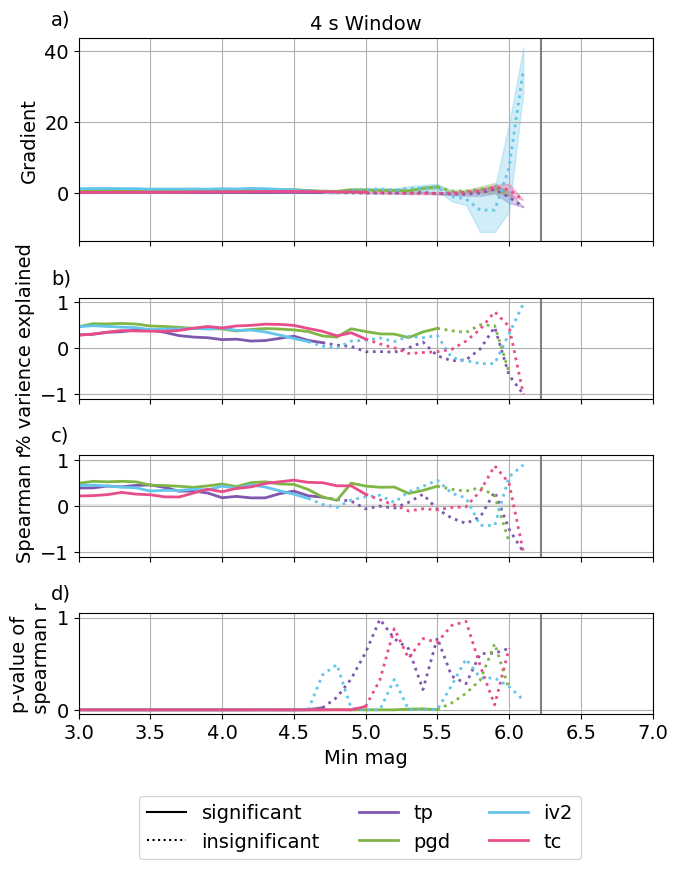

In [10]:
%matplotlib inline
for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    df = make_subset_df(df, 10000)
    df = df.transpose()
    df = df.reset_index(drop=True)
    #print(df.head(10))
    x_tp, y_tp = calc_tp_mag_lim(df, 3.)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)

    
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tp_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    tp_params = [gradt, gradt_std, pearson, spearman, spearman_p, n, 'tp']
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'tp', False)  
    print('tp', spearman[0])
    
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_pgd_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)  
    pgd_params = [gradt, gradt_std, pearson, spearman, spearman_p, n,  'pgd']
    print('pgd', spearman[0])
    
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tc_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)  
    tc_params = [gradt, gradt_std, pearson, spearman, spearman_p, n, 'tc']
    print('tc', spearman[0])
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_iv2_mag_lim(df, mag_lim)
        #print(len(x[y==0]))
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', False)  
    iv2_params = [gradt, gradt_std, pearson, spearman, spearman_p, n,'iv2']
    print('iv2', spearman[0])
    #plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params)
    plot_spearman_subplots_all_on_one_no_n_shaded_percent_var(f, tp_params, pgd_params, iv2_params, tc_params, log = False, save = True, g_r = True)
    #print(tp_params[4][0], tc_params[4][0])
    #plot_spearman_subplots_all_on_one(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True) 
    
